In [7]:
from Bio import AlignIO, Phylo, SeqIO
from bs4 import BeautifulSoup
import matplotlib as mpl
from matplotlib import pyplot as plt

import requests
from tqdm import tqdm_notebook as tqdm

%matplotlib inline
mpl.rcParams["font.size"] = 24

In [90]:
acc_numbers = ["FJ1593{}".format(i) for i in range(28, 71)]

In [94]:
BASE_URL = "https://www.ncbi.nlm.nih.gov"
uids = []

for acc in tqdm(acc_numbers, total=len(acc_numbers)):
    data = requests.get("{}/nuccore/{}.1".format(BASE_URL, acc), params={"report": "fasta"}).text
    soup = BeautifulSoup(data, 'html.parser')
    cur_uid = soup.find("head").findAll("meta", attrs={"name":"ncbi_uidlist"})[0].attrs["content"]
    uids.append(int(cur_uid))

In [104]:
fastas = []

for uid in tqdm(uids):
    param_dict = {
        "id": uid,
        "db": "nuccore",
        "report": "fasta"
    }

    data = requests.get("https://www.ncbi.nlm.nih.gov/sviewer/viewer.fcgi", params=param_dict)
    fastas.append(data.text)

In [106]:
CLUSTAL_OMEGA = "/home/analytics/distr/clustalo"

In [110]:
with open("../data/vWF.fa", "w") as f:
    for fasta in fastas:
        f.write(fasta)

In [112]:
!$CLUSTAL_OMEGA -i ../data/vWF.fa > ../data/vWF.aln

In [114]:
!cat ../data/vWF.aln

>FJ159328.1 Caluromys lanatus voucher ROM104570 von Willebrand Factor (VWF) gene, exon 28 and partial cds
AAGCTGTCAGAGGCTGAATTTGAAGTGCTGAAGGCTTTTGTCGTAGGTGTGATGGAGCGT
TTACACATCTCTCAGAAGCGCATCCGGGTGGCCGTGGTGGAATACCATGATGGTTCCCAC
TCCTACATTGAACTGAAAGATCGGAAGAGACCCTCAGAGCTTCGTCGGATTGCCAGTTCT
GTGAGATATCCTGGCAGCAAGATGGCATCCACCAGTGAGGTGCTGAAGTTTACCCTTTTC
CATGTCTTTGGCAAGGCTGACCGCCCTGAAGCATCTCGGATTGCCTTGCTTTTGACAGCC
AGTGAGGAGCCCTTTCCCATGGCTAAGTCTATAGCTCTCTATGTCCAACGTCTGAAGAAG
AAGAAGGTCATTGTGATCCCAGTGGGCTTGGGGCCCCATGCTAGCCTCAAGCAGATTCAT
ATCATTGAGAAGCAGGCACCAGAAAACAAGGCCTTTTTGCTTAGTGGTGTGAATGAGCTA
GAGCAAAGGCGGGATGACATCTTGGGCTACCTTTGTGACCTGGTACCTGATATTCCTGCT
CCTACCATCCCCTCCCAGATGGCAAAGGTTACTGTGAGTCCTGAGCTCTTGGCATCCCCA
ACTTCTATCCATAGTAAAGGCATGGTTCTGGATGTGGTGTTTGTGCTAGAAGGTTCAGAC
AAAATTGGTGAAGCCAACTTCAACAAGAGCAAGGAGTTCATGGAGCAAGTGATTCAACGA
ATGGATGTGAGGCAAGGTAGCATCCACATCTCCATCCTGCAATACTCTTACACAGTGTCT
GTGGAATTCTCCTTCAATGAGACTCAGTCTAAGAGACATATCCTGGAGAGGATACAGCAG
ATACACTATCGAGGAGGCAACAGAACCAATACAGGGAAGG

In [14]:
species_strings = !cat ../data/vWF.aln.fa | grep -e ">" | awk '{ print $1" "$2" "$3 }'
species_dict = dict()

for s in species_strings:
    species_dict[s.split()[0][1:]] = " ".join(s.split()[1:])

In [117]:
data = open("../data/vWF.aln").read()

In [120]:
SEQMAGIC = "/home/analytics/distr/seqmagick/seqmagick.py"

In [122]:
!mv ../data/vWF.aln ../data/vWF.aln.fa

In [124]:
!$SEQMAGIC convert ../data/vWF.aln.fa ../data/vWF.nex --alphabet dna

In [58]:
with open("../data/vWF.nex", "r") as f:
    tree_data = f.read()
    for k, v in species_dict.items():
        tree_data = tree_data.replace(k, v.replace(" ", "_"))
        
with open("../data/vWF.fix.nex", "w") as f:
    f.write(tree_data)

In [54]:
with open("../data/vWF.nex.trprobs", "r") as f:
    tree_data = f.read()
    for k, v in species_dict.items():
        tree_data = tree_data.replace(k, v.replace(" ", "_"))
        
with open("../data/vWF.nex.fix.trprobs", "w") as f:
    f.write(tree_data)

In [55]:
trees = Phylo.parse('../data/vWF.nex.fix.trprobs', "nexus")

In [50]:
with open("../data/vWF.nwk", "r") as f:
    tree_data = f.read()
    for k, v in species_dict.items():
        tree_data = tree_data.replace(k, v.replace(" ", "_"))
        
with open("../data/vWF.fix.nwk", "w") as f:
    f.write(tree_data)

In [30]:
Phylo.parse??

In [59]:
trees = Phylo.parse('../data/vWF.fix.nwk', "newick")

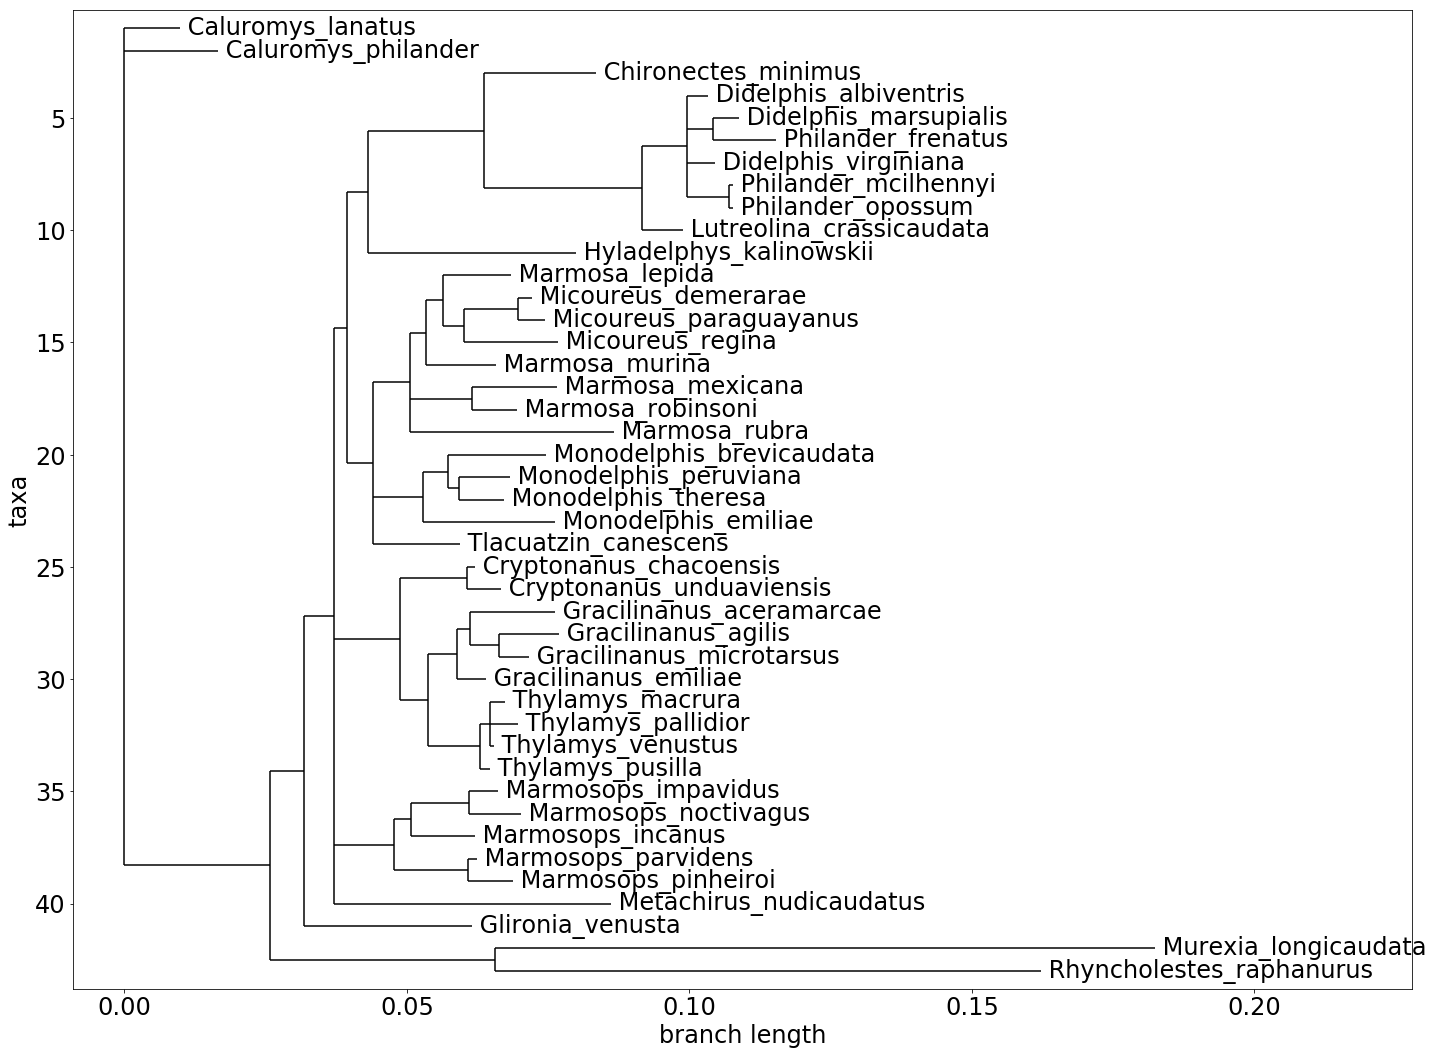

In [60]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(1, 1, 1)
Phylo.draw(next(trees), axes=ax)